homework link: https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/tree/master/homework

# Import Libs

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

# Load Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### الف

In [3]:
print('The number of classes: ', len(np.unique(train_labels)))

The number of classes:  10


### ب

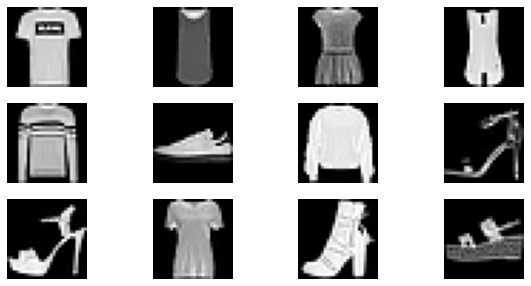

In [4]:
plt.figure(figsize=(10,5))
for img in range(1, 13):
    plt.subplot(3, 4, img)
    plt.imshow(train_images[img], cmap='gray')
    plt.axis('off')

### ج

In [5]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images.shape

(60000, 28, 28)

### د

In [135]:
def creat_model():
    model = keras.Sequential(name='myFashionMNIST')
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.6))
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [136]:
model = creat_model()
model.summary()

Model: "myFashionMNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 64)                50240     
                                                                 
 dense_58 (Dense)            (None, 128)               8320      
                                                                 
 dense_59 (Dense)            (None, 64)                8256      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_60 (Dense)            (None, 10)                650       
                                                                 
Total params: 67,466
Trainable params: 67,466
Non-tr

In [137]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

In [138]:
from gc import callbacks
batch_size = 32           # @param
epochs  = 100             # @param 
validation_split = 0.2    # @param
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(x=train_images,
                    y=train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    callbacks=[es]
                )  


Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 1.2248 - acc: 0.5824 - val_loss: 0.6235 - val_acc: 0.7990
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7376 - acc: 0.7530 - val_loss: 0.5104 - val_acc: 0.8266
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6325 - acc: 0.7887 - val_loss: 0.4682 - val_acc: 0.8365
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5794 - acc: 0.8077 - val_loss: 0.4491 - val_acc: 0.8392
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5426 - acc: 0.8192 - val_loss: 0.4217 - val_acc: 0.8493
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5163 - acc: 0.8282 - val_loss: 0.4070 - val_acc: 0.8539
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4946 - acc: 0.8327 - val_loss: 0.4004 - val_acc: 0.8547
Epoch 8/100
1500/1500 [==============================] 

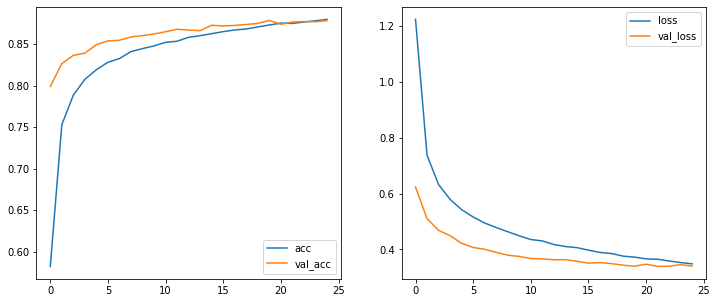

In [139]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [140]:
model.evaluate(test_images,  test_labels, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3595 - acc: 0.8735


[0.3595224916934967, 0.8734999895095825]

Predicted Class: 3


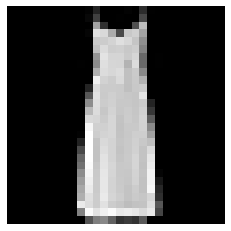

In [141]:
preds = model.predict(test_images)

sample = 13
print('Predicted Class:', np.argmax(preds[sample]))
plt.imshow(test_images[sample], cmap='gray');
plt.axis('off');

Label |	Class
:|:
0  |T-shirt/top
1  |Trouser
2  |Pullover
3  |	Dress
4  |	Coat
5  |	Sandal
6  |	Shirt
7  |	Sneaker
8  |	Bag
9  |	Ankle boot